#210968222
#DEVANSH CHUGH

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
df=pd.read_csv("employment.csv",index_col="datestamp",parse_dates=True)
df

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-10-01,11.8,10.3,18.7,12.9,6.0,7.0,3.5,8.2,12.4,12.2,10.8,10.9,8.5,5.9,8.6,9.6
2009-11-01,12.6,10.6,19.4,12.7,5.5,6.7,3.4,7.6,11.9,12.5,12.0,12.0,8.0,5.7,8.5,9.2
2009-12-01,19.7,10.3,22.7,13.3,5.6,7.2,3.6,8.5,12.6,11.9,11.8,9.5,8.2,5.9,9.0,9.1


### (1) Convert datestamp column to a datetime object and Set the datestamp columns as the index of your DataFrame. Check if there are missing values in each column. 

In [2]:
df2=df.isnull().sum()
df2

Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64

#### No missing values.

In [3]:
df.index=pd.to_datetime(df.index)
df

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-10-01,11.8,10.3,18.7,12.9,6.0,7.0,3.5,8.2,12.4,12.2,10.8,10.9,8.5,5.9,8.6,9.6
2009-11-01,12.6,10.6,19.4,12.7,5.5,6.7,3.4,7.6,11.9,12.5,12.0,12.0,8.0,5.7,8.5,9.2
2009-12-01,19.7,10.3,22.7,13.3,5.6,7.2,3.6,8.5,12.6,11.9,11.8,9.5,8.2,5.9,9.0,9.1


### (2) Generate a boxplot to find the distribution of unemployment rate for every industry.

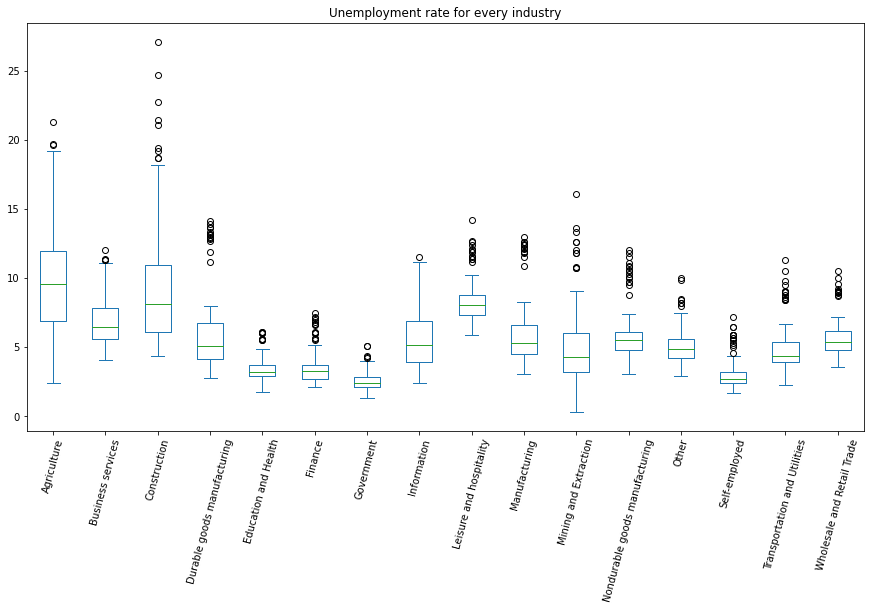

In [4]:
df.plot.box(title="Unemployment rate for every industry",rot=75,figsize=(15,7.5))
plt.show()

### (3) Using line chart Visualize the unemployment rate of workers by industry. 

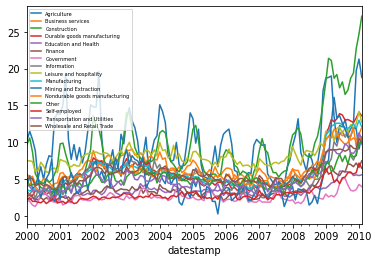

In [5]:
df.plot(kind="line")
fontsize=5
plt.legend(loc="upper left", frameon=True, fontsize=fontsize)
plt.show()

### (4) Plot the monthly and yearly trends. 

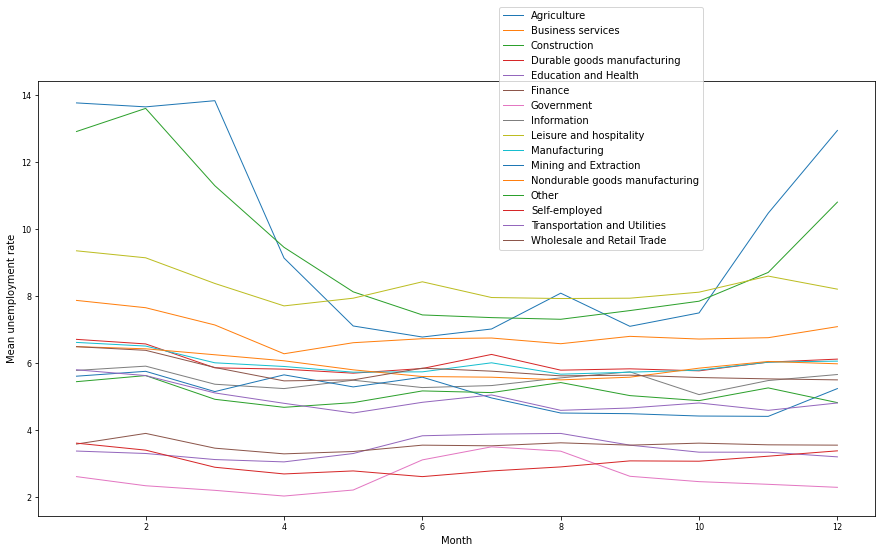

In [6]:
index_year = df.index.year
df_by_year = df.groupby(index_year).mean()
index_month = df.index.month
jobs_by_month = df.groupby(index_month).mean()
ax = jobs_by_month.plot(fontsize=8, linewidth=1, figsize=(15,8));
ax.set_xlabel('Month', fontsize=10);
ax.set_ylabel('Mean unemployment rate', fontsize=10);
ax.legend(bbox_to_anchor=(0.8, 0.6), fontsize=10);

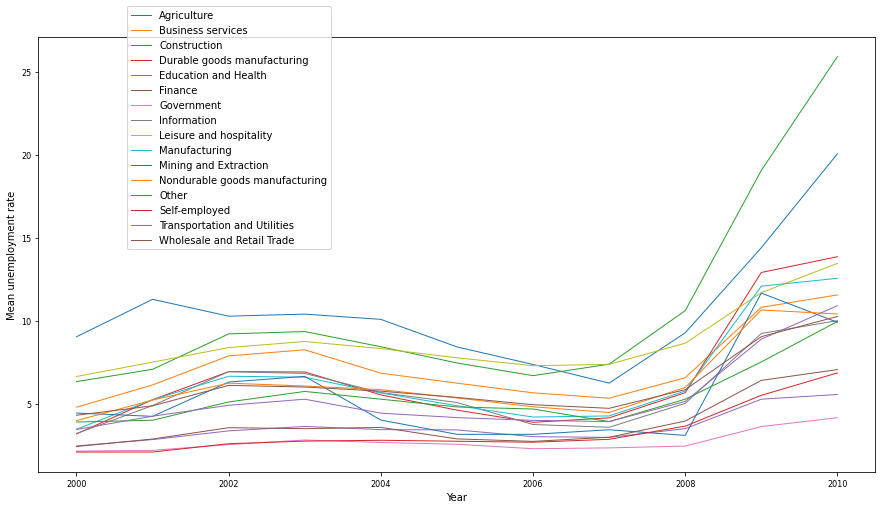

In [7]:
index_year = df.index.year
jobs_by_year = df.groupby(index_year).mean()
ax = jobs_by_year.plot(fontsize=8, linewidth=1, figsize=(15,8));
ax.set_xlabel('Year', fontsize=10);
ax.set_ylabel('Mean unemployment rate', fontsize=10);
ax.legend(bbox_to_anchor=(0.1, 0.5), fontsize=10);

### (5) Apply time series decomposition to your dataset to visualize the trend and seasonality. 

In [8]:
df_decomp={}
column_names=df.columns
for ts in column_names:
    ts_decomposition=seasonal_decompose(df[ts])
    df_decomp[ts]=ts_decomposition
print(df_decomp)

{'Agriculture': <statsmodels.tsa.seasonal.DecomposeResult object at 0x000001B0BADB1B50>, 'Business services': <statsmodels.tsa.seasonal.DecomposeResult object at 0x000001B0BADE7730>, 'Construction': <statsmodels.tsa.seasonal.DecomposeResult object at 0x000001B0BADE79D0>, 'Durable goods manufacturing': <statsmodels.tsa.seasonal.DecomposeResult object at 0x000001B0BADEE820>, 'Education and Health': <statsmodels.tsa.seasonal.DecomposeResult object at 0x000001B0BADF7160>, 'Finance': <statsmodels.tsa.seasonal.DecomposeResult object at 0x000001B0BADF7B20>, 'Government': <statsmodels.tsa.seasonal.DecomposeResult object at 0x000001B0B9FAACD0>, 'Information': <statsmodels.tsa.seasonal.DecomposeResult object at 0x000001B0BAD50520>, 'Leisure and hospitality': <statsmodels.tsa.seasonal.DecomposeResult object at 0x000001B0BAD50130>, 'Manufacturing': <statsmodels.tsa.seasonal.DecomposeResult object at 0x000001B0BAD39040>, 'Mining and Extraction': <statsmodels.tsa.seasonal.DecomposeResult object at 0

### 6. Visualize the seasonality of Agriculture, Health and Finance sector.

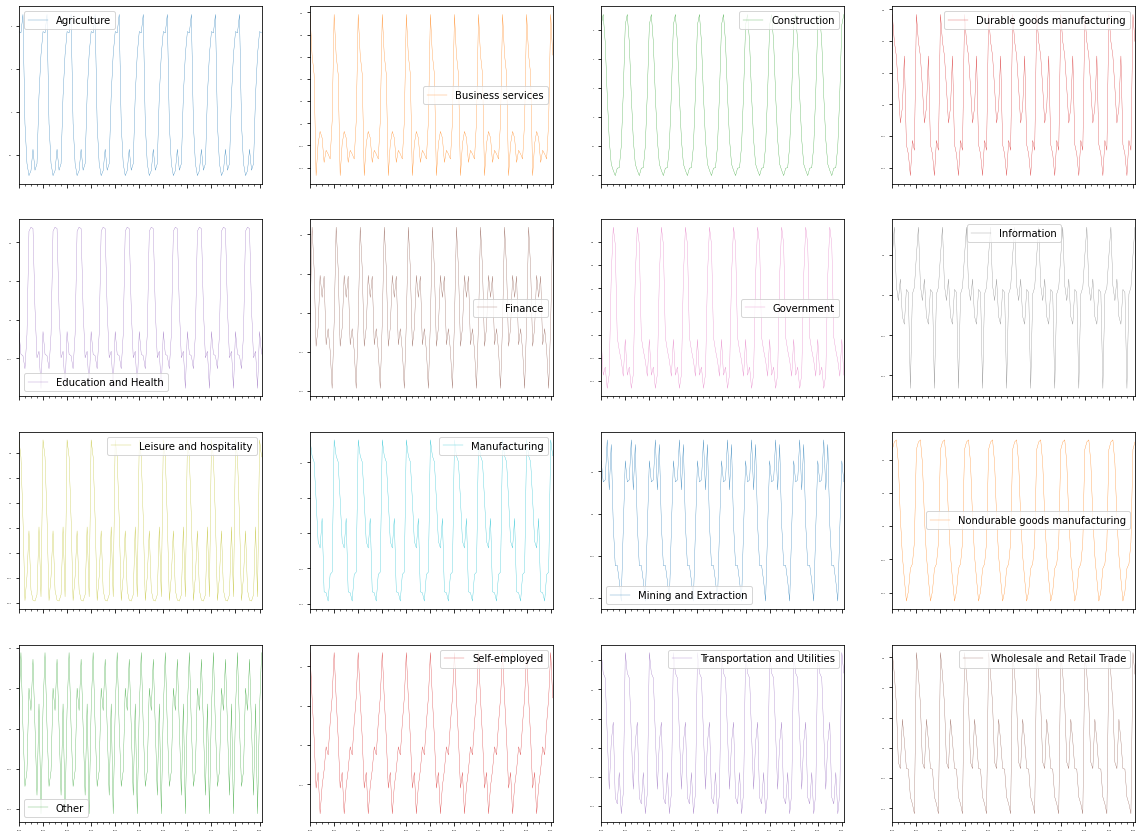

In [9]:
df_seasonal = {}
for ts in column_names:
    df_seasonal[ts] = df_decomp[ts].seasonal
seasonality_df = pd.DataFrame.from_dict(df_seasonal)
seasonality_df.index.name = None
seasonality_df.plot(subplots=True,layout=(4, 4),sharey=False,fontsize=2,linewidth=0.3,figsize=(20,15));